In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re
from scipy.stats import boxcox
import pandas.plotting as pdplt

In [27]:
data=pd.read_csv('./Ordinal_Encoding.csv')

In [28]:
data['class'].value_counts()

class
1    206774
0     93487
Name: count, dtype: int64

In [29]:
data.columns

Index(['Unnamed: 0', 'day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox', 'price_unskewed_sqrt',
       'price_unskewed'],
      dtype='object')

In [31]:
economy_data = data[data['class'] == 1].drop(['class'], axis=1)
business_data = data[data['class'] == 0].drop(['class'], axis=1)

In [32]:
economy_data.columns

Index(['Unnamed: 0', 'day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox', 'price_unskewed_sqrt',
       'price_unskewed'],
      dtype='object')

In [33]:
print(economy_data.shape)
print(business_data.shape)

(206774, 20)
(93487, 20)


In [34]:
economy_data.head()

,Unnamed: 0,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,duration,days_left,price,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox,price_unskewed_sqrt,price_unskewed
0,0,4,4,2,18,2,0,21,4,5,130,1,5953,-1.000000,-1.836970e-16,-7.071068e-01,7.071068e-01,3.560261,77.155687,8.691651
1,1,4,4,2,6,0,0,8,1,5,140,1,5953,1.000000,6.123234e-17,8.660254e-01,-5.000000e-01,3.560261,77.155687,8.691651
2,2,4,1,2,4,0,0,6,0,5,130,1,5956,0.866025,5.000000e-01,1.000000e+00,6.123234e-17,3.560320,77.175126,8.692154
3,3,4,7,2,10,1,0,12,3,5,135,1,5955,0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,3.560300,77.168646,8.691986
4,4,4,7,2,8,1,0,11,1,5,140,1,5955,0.866025,-5.000000e-01,2.588190e-01,-9.659258e-01,3.560300,77.168646,8.691986


In [35]:
# Preprocess X and y(target) values
X_economy = economy_data.drop(['price'], axis=1)
y_economy = economy_data['price']

X_business = business_data.drop(['price'], axis=1)
y_business = business_data['price']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the economy data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Training the model for economy class
model_economy = LinearRegression()
model_economy.fit(X_train_economy, y_train_economy)

# Predicting and evaluating for economy class
predictions_economy = model_economy.predict(X_test_economy)
rmse_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_economy))
print(f'Economy class RMSE: {rmse_economy}')


# Splitting the business data
X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

# Training the model for business class
model_business = LinearRegression()
model_business.fit(X_train_business, y_train_business)

# Predicting and evaluating for business class
predictions_business = model_business.predict(X_test_business)
rmse_business = np.sqrt(mean_squared_error(y_test_business, predictions_business))
print(f'business class RMSE: {rmse_business}')

Economy class RMSE: 44.820012550494674
business class RMSE: 43.473955651370055


In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_price_economy = y_train_economy.mean()
predictions_baseline_economy = [mean_price_economy] * len(y_test_economy)
rmse_baseline_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_baseline_economy))
print(f"Economy Baseline Model RMSE: {rmse_baseline_economy}")


mean_price_business = y_train_business.mean()
predictions_baseline_business = [mean_price_business] * len(y_test_business)
rmse_baseline_business = np.sqrt(mean_squared_error(y_test_business, predictions_baseline_business))
print(f"Business Baseline Model RMSE: {rmse_baseline_business}")


Economy Baseline Model RMSE: 3730.817030689761
Business Baseline Model RMSE: 13004.965080623018


In [38]:
print(f"Economy Mean Price: {y_train_economy.mean()}, Std Dev of Price: {y_train_economy.std()}")
print(f"Business Mean Price: {y_train_business.mean()}, Std Dev of Price: {y_train_business.std()}")


Economy Mean Price: 6571.049214419142, Std Dev of Price: 3746.592682487904
Business Mean Price: 52515.086282742115, Std Dev of Price: 12960.416315768694


In [39]:
from sklearn.model_selection import cross_val_score

scores_economy = cross_val_score(model_economy, X_economy, y_economy, cv=5, scoring='neg_mean_squared_error')
rmse_scores_economy = np.sqrt(-scores_economy)
print(f"Cross-Validation RMSE: {rmse_scores_economy.mean()}")

scores_business = cross_val_score(model_business, X_business, y_business, cv=5, scoring='neg_mean_squared_error')
rmse_scores_business = np.sqrt(-scores_business)
print(f"Cross-Validation RMSE: {rmse_scores_business.mean()}")

Cross-Validation RMSE: 50.582256994295406
Cross-Validation RMSE: 45.52933365483296


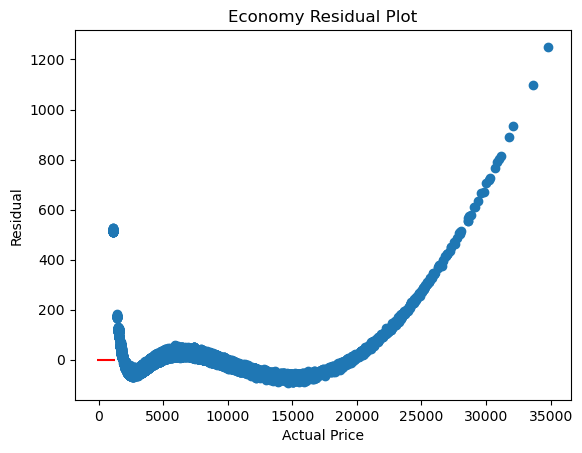

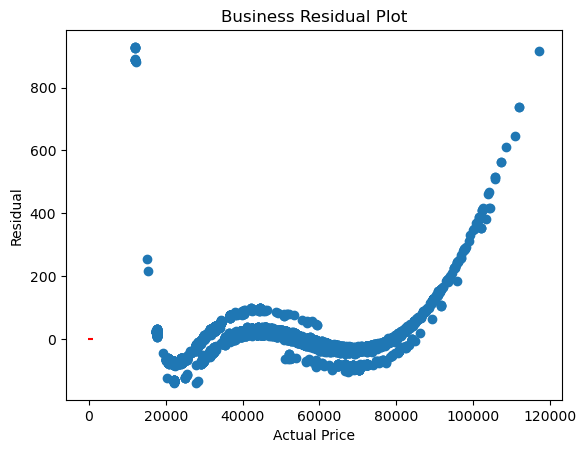

In [40]:
residuals_economy = y_test_economy - predictions_economy
plt.scatter(y_test_economy, residuals_economy)
plt.hlines(y=0, xmin=residuals_economy.min(), xmax=residuals_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot')
plt.show()

residuals_business = y_test_business - predictions_business
plt.scatter(y_test_business, residuals_business)
plt.hlines(y=0, xmin=residuals_business.min(), xmax=residuals_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot')
plt.show()


In [41]:
## What the above show so far using a simple Linear Regression Algorithm:
# This algorithm is not good for predicting high priced tickets.

In [42]:
import numpy as np

# Apply log transformation
y_train_economy_log = np.log(y_train_economy)
y_test_economy_log = np.log(y_test_economy)

# Retrain the model on the transformed target variable
model_economy_log = LinearRegression()
model_economy_log.fit(X_train_economy, y_train_economy_log)

# Predict on the test set and transform predictions back to the original scale
predictions_economy_log = model_economy_log.predict(X_test_economy)
predictions_economy_log = np.exp(predictions_economy_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_economy_log = np.sqrt(mean_squared_error(y_test_economy, predictions_economy_log))
print(f"Economy class RMSE after log transformation: {rmse_economy_log}")


# Apply log transformation
y_train_business_log = np.log(y_train_business)
y_test_business_log = np.log(y_test_business)

# Retrain the model on the transformed target variable
model_business_log = LinearRegression()
model_business_log.fit(X_train_business, y_train_business_log)

# Predict on the test set and transform predictions back to the original scale
predictions_business_log = model_business_log.predict(X_test_business)
predictions_business_log = np.exp(predictions_business_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_business_log = np.sqrt(mean_squared_error(y_test_business, predictions_business_log))
print(f"business class RMSE after log transformation: {rmse_business_log}")


Economy class RMSE after log transformation: 7.789640472198974e-11
business class RMSE after log transformation: 1.4887935791108272e-10


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_economy, y_train_economy,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Economy Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_business, y_train_business,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Business Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


Economy Average RMSE (log-transformed target) with 5-Fold CV: 0.03487106829999188
Business Average RMSE (log-transformed target) with 5-Fold CV: 0.0028214970047057515


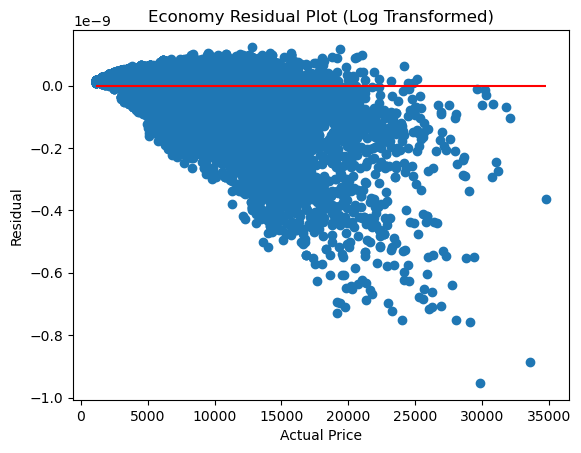

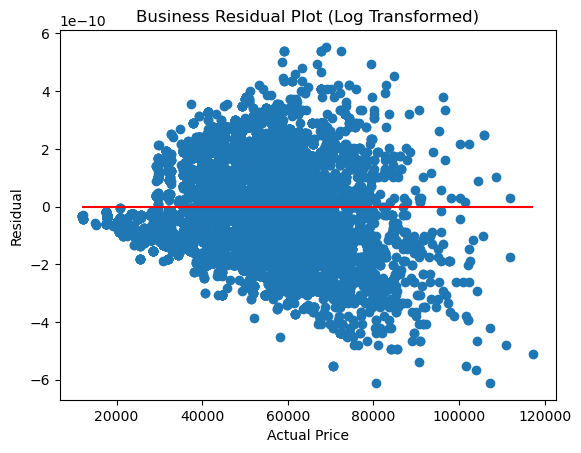

In [44]:
# Calculate residuals for the transformed predictions
residuals_economy_log = y_test_economy - predictions_economy_log

# Plot residuals for economy class
plt.scatter(y_test_economy, residuals_economy_log)
plt.hlines(y=0, xmin=y_test_economy.min(), xmax=y_test_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot (Log Transformed)')
plt.show()

# Calculate residuals for the transformed predictions
residuals_business_log = y_test_business - predictions_business_log

# Plot residuals for business class
plt.scatter(y_test_business, residuals_business_log)
plt.hlines(y=0, xmin=y_test_business.min(), xmax=y_test_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot (Log Transformed)')
plt.show()
